In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('ev.csv')  # Load dataset
df.head()


,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [7]:
df.shape              # Rows and columns
df.info()             # Data types and nulls
df.head()             # First few records
df.describe()         # Summary statistics
df.columns            # All column names
df.nunique()          # Unique values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   5000 non-null   object 
 1   Latitude                     5000 non-null   float64
 2   Longitude                    5000 non-null   float64
 3   Address                      5000 non-null   object 
 4   Charger Type                 5000 non-null   object 
 5   Cost (USD/kWh)               5000 non-null   float64
 6   Availability                 5000 non-null   object 
 7   Distance to City (km)        5000 non-null   float64
 8   Usage Stats (avg users/day)  5000 non-null   int64  
 9   Station Operator             5000 non-null   object 
 10  Charging Capacity (kW)       5000 non-null   int64  
 11  Connector Types              5000 non-null   object 
 12  Installation Year            5000 non-null   int64  
 13  Renewable Energy S

Station ID                     5000
Latitude                       4993
Longitude                      4995
Address                        4933
Charger Type                      3
Cost (USD/kWh)                   41
Availability                      3
Distance to City (km)          1808
Usage Stats (avg users/day)      91
Station Operator                  5
Charging Capacity (kW)            4
Connector Types                  16
Installation Year                14
Renewable Energy Source           2
Reviews (Rating)                 21
Parking Spots                    10
Maintenance Frequency             3
dtype: int64

In [21]:
df.isnull().sum()     # Checking missing values

df.duplicated().sum() # Check for duplicates
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [33]:
print(df.columns.tolist())


['station_id', 'latitude', 'longitude', 'address', 'charger_type', 'cost_(usd/kwh)', 'availability', 'distance_to_city_(km)', 'usage_stats_(avg_users/day)', 'station_operator', 'charging_capacity_(kw)', 'connector_types', 'installation_year', 'renewable_energy_source', 'reviews_(rating)', 'parking_spots', 'maintenance_frequency']


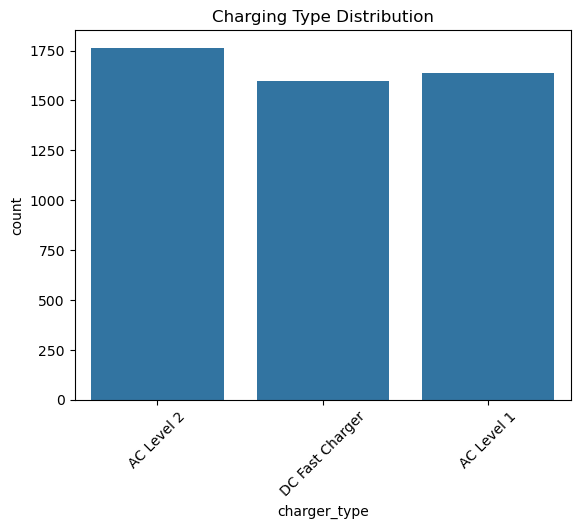

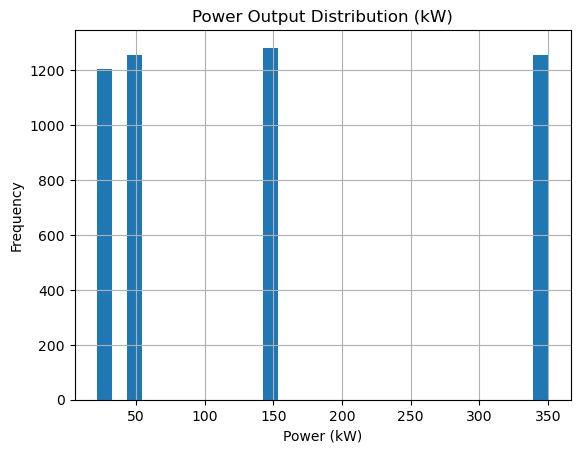

In [39]:
#Univariate Analysis
# Categorical
sns.countplot(data=df, x='charger_type')
plt.title('Charging Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Numerical
df['charging_capacity_(kw)'].hist(bins=30)
plt.title('Power Output Distribution (kW)')
plt.xlabel('Power (kW)')
plt.ylabel('Frequency')
plt.show()


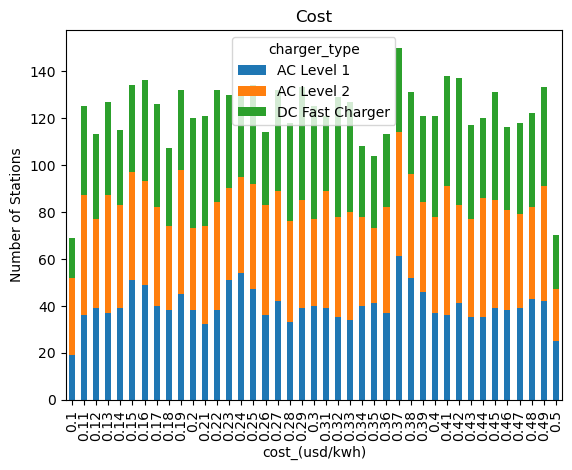

In [64]:
#Bivariate/Multivariate Analysis
# Charging Type vs Location
pd.crosstab(df['cost_(usd/kwh)'], df['charger_type']).plot(kind='bar', stacked=True)
plt.title('Cost')
plt.ylabel('Number of Stations')
plt.xticks(rotation=90)
plt.show()




C:\Users\HP\AppData\Local\Temp\ipykernel_6584\3506167168.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



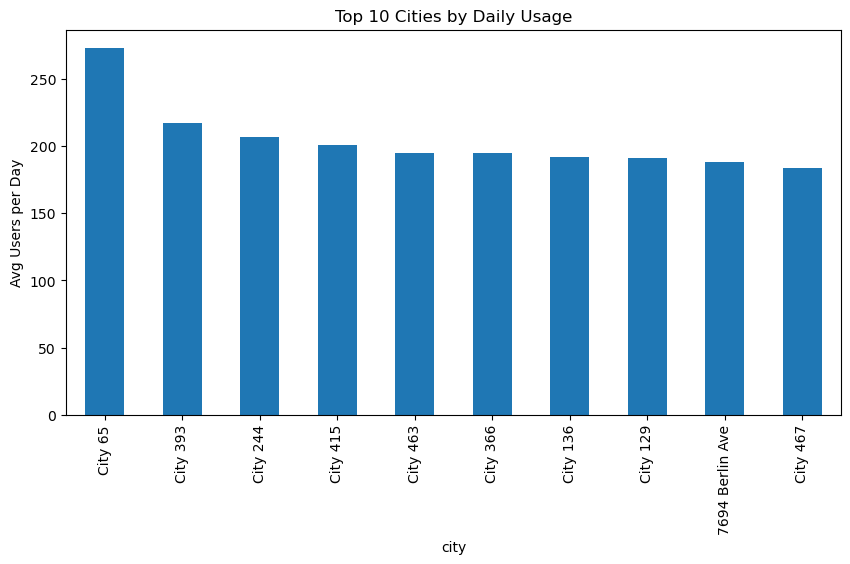

In [92]:
# Extract city names from address
df['city'] = df['address'].str.split(',').str[-2].str.strip()

top_cities = df.groupby('city')['usage_stats_(avg_users/day)'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', figsize=(10,5), title="Top 10 Cities by Daily Usage")
plt.ylabel("Avg Users per Day")
plt.show()

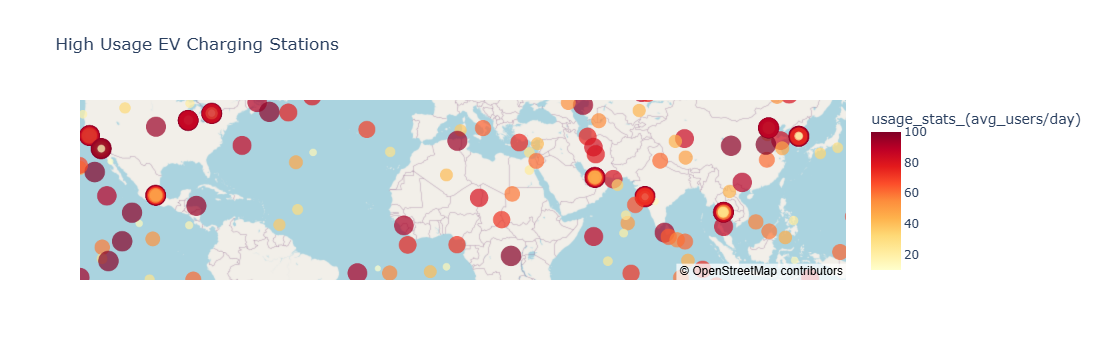

In [94]:
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="usage_stats_(avg_users/day)",
                        size="usage_stats_(avg_users/day)",
                        color_continuous_scale="YlOrRd",
                        size_max=15,
                        zoom=1,
                        mapbox_style="open-street-map",
                        title="High Usage EV Charging Stations")
fig.show()

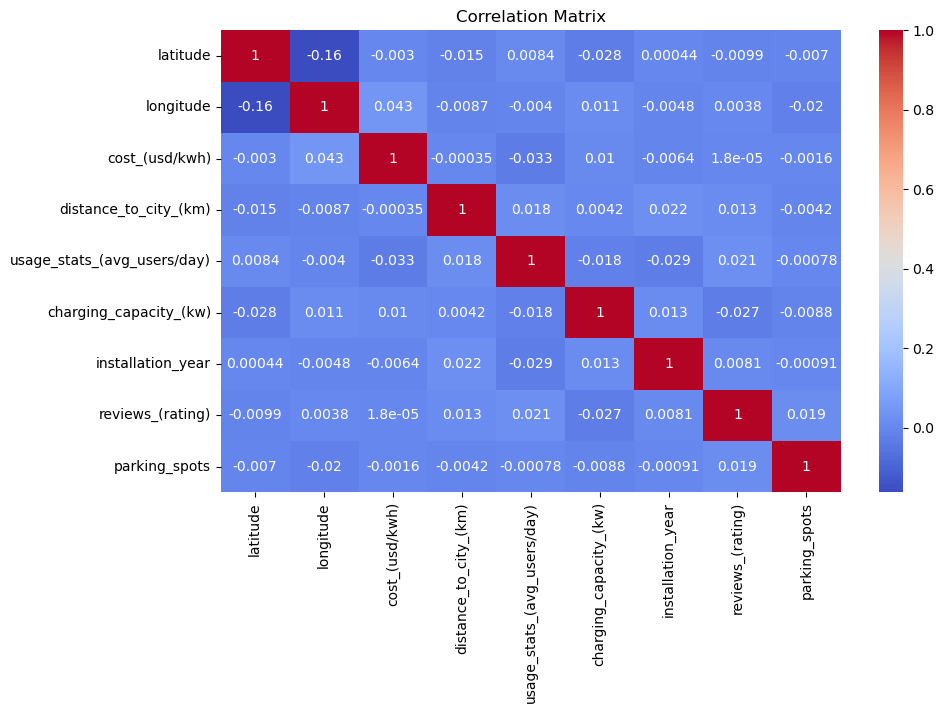

In [50]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6584\780010163.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




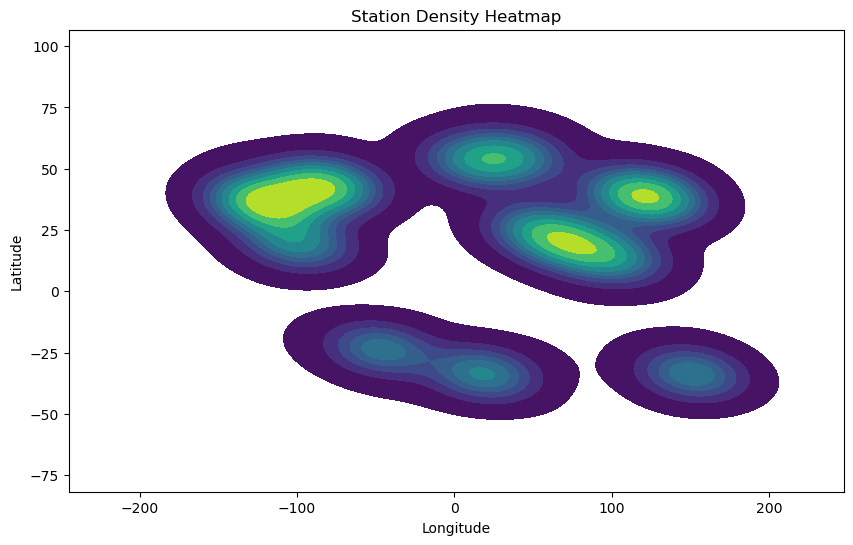

In [88]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['longitude'], y=df['latitude'], cmap='viridis', shade=True)
plt.title('Station Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


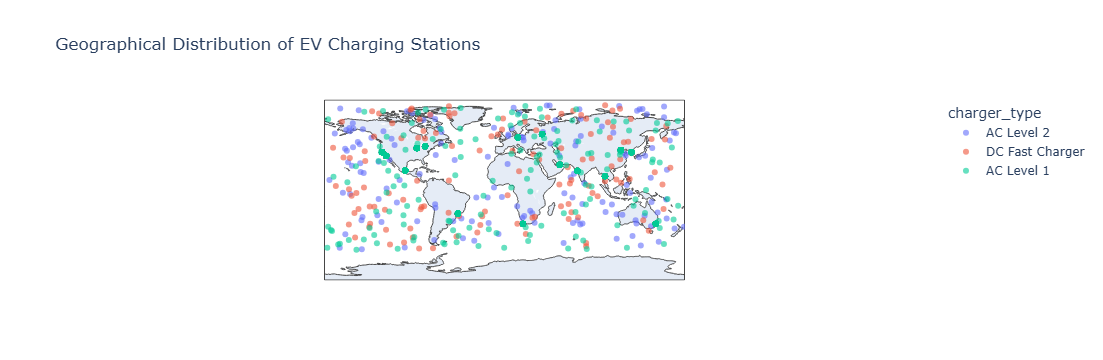

In [90]:
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     hover_name='station_id',
                     color='charger_type',
                     title='Geographical Distribution of EV Charging Stations',
                     opacity=0.6)
fig.show()


In [84]:
df.to_csv('ev_cleaned.csv', index=False)
